# Gabarito para o professor

### Aula 3


Amostra dos Dados:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Informação do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Colum

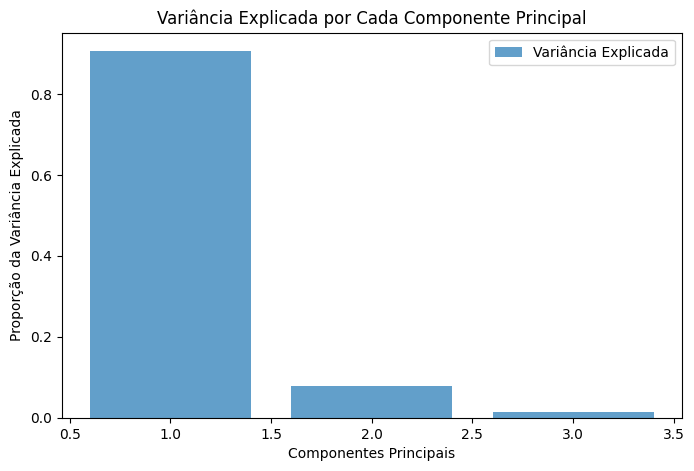

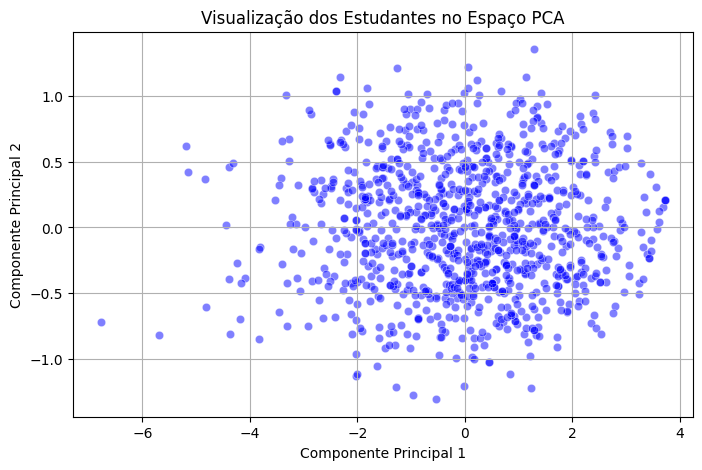


Componentes Principais:
     math score  reading score  writing score
PC1    0.554725       0.589885       0.586785
PC2    0.831100      -0.359428      -0.424364
PC3   -0.039419       0.723082      -0.689637


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Passo 1: Carregar a base de dados real do Kaggle
df = pd.read_csv("[DADOS]ANO2C1B4S25A3_Student_data.csv")  # Certifique-se de ter baixado o dataset

# Passo 2: Explorar e visualizar os dados
print("\nAmostra dos Dados:")
print(df.head())
print("\nInformação do Dataset:")
print(df.info())

# Passo 3: Selecionar apenas as colunas numéricas
df_numerico = df[["math score", "reading score", "writing score"]]
print("\nResumo Estatístico das Notas:")
print(df_numerico.describe())

# Passo 4: Normalizar os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerico)

# Passo 5: Aplicar PCA
pca = PCA(n_components=3)  # Mantendo até 3 componentes
pca.fit(df_scaled)

# Variância explicada por cada componente principal
variancia_explicada = pca.explained_variance_ratio_
print("\nVariância Explicada por Componente Principal:")
for i, var in enumerate(variancia_explicada):
    print(f"PC{i+1}: {var:.2%}")

# Transformação dos dados para os componentes principais
df_pca = pca.transform(df_scaled)
df_pca_result = pd.DataFrame(df_pca, columns=["PC1", "PC2", "PC3"])

# Passo 6: Visualizar a Variância Explicada
plt.figure(figsize=(8,5))
plt.bar(range(1, len(variancia_explicada)+1), variancia_explicada, alpha=0.7, align='center', label='Variância Explicada')
plt.xlabel('Componentes Principais')
plt.ylabel('Proporção da Variância Explicada')
plt.title('Variância Explicada por Cada Componente Principal')
plt.legend()
plt.show()

# Passo 7: Visualizar os Componentes Principais
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_pca_result["PC1"], y=df_pca_result["PC2"], alpha=0.5, color='blue')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Visualização dos Estudantes no Espaço PCA")
plt.grid()
plt.show()

# Exibir os Componentes Principais
print("\nComponentes Principais:")
print(pd.DataFrame(pca.components_, columns=df_numerico.columns, index=["PC1", "PC2", "PC3"]))
